### Introduction
<it>This EDA looks at crime incident reports in the city of Boston from June 2015 to September 2018.<it>

In [51]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# Import data
boston_data = pd.read_csv('crime.csv', encoding='latin-1')

# Peek
print(boston_data.head())

#shape
print(boston_data.shape)

  INCIDENT_NUMBER  OFFENSE_CODE    OFFENSE_CODE_GROUP   OFFENSE_DESCRIPTION  \
0      I182070945           619               Larceny    LARCENY ALL OTHERS   
1      I182070943          1402             Vandalism             VANDALISM   
2      I182070941          3410                 Towed   TOWED MOTOR VEHICLE   
3      I182070940          3114  Investigate Property  INVESTIGATE PROPERTY   
4      I182070938          3114  Investigate Property  INVESTIGATE PROPERTY   

  DISTRICT REPORTING_AREA SHOOTING     OCCURRED_ON_DATE  YEAR  MONTH  \
0      D14            808      NaN  2018-09-02 13:00:00  2018      9   
1      C11            347      NaN  2018-08-21 00:00:00  2018      8   
2       D4            151      NaN  2018-09-03 19:27:00  2018      9   
3       D4            272      NaN  2018-09-03 21:16:00  2018      9   
4       B3            421      NaN  2018-09-03 21:05:00  2018      9   

  DAY_OF_WEEK  HOUR    UCR_PART       STREET        Lat       Long  \
0      Sunday    13   

In [53]:
#statistic of dataset
boston_data.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,319073.000000,319073.000000,319073.000000,319073.000000,299074.000000,299074.000000
mean,2317.546956,2016.560586,6.609719,13.118205,42.214381,-70.908272
std,1185.285543,0.996344,3.273691,6.294205,2.159766,3.493618
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297442,-71.097135
50%,2907.000000,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


Nothing concluive from statistic

In [54]:
# check null and Dtypes
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319073 non-null  object 
 1   OFFENSE_CODE         319073 non-null  int64  
 2   OFFENSE_CODE_GROUP   319073 non-null  object 
 3   OFFENSE_DESCRIPTION  319073 non-null  object 
 4   DISTRICT             317308 non-null  object 
 5   REPORTING_AREA       319073 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319073 non-null  object 
 8   YEAR                 319073 non-null  int64  
 9   MONTH                319073 non-null  int64  
 10  DAY_OF_WEEK          319073 non-null  object 
 11  HOUR                 319073 non-null  int64  
 12  UCR_PART             318983 non-null  object 
 13  STREET               308202 non-null  object 
 14  Lat                  299074 non-null  float64
 15  Long             

In [55]:
# checking number of unique values in each column
boston_data.nunique()

INCIDENT_NUMBER        282517
OFFENSE_CODE              222
OFFENSE_CODE_GROUP         67
OFFENSE_DESCRIPTION       244
DISTRICT                   12
REPORTING_AREA            879
SHOOTING                    1
OCCURRED_ON_DATE       233229
YEAR                        4
MONTH                      12
DAY_OF_WEEK                 7
HOUR                       24
UCR_PART                    4
STREET                   4657
Lat                     18178
Long                    18178
Location                18194
dtype: int64

In [56]:
#percentage of Null values
for col in boston_data.columns:
    print(f"{col} : {round(boston_data[col].isnull().sum()/len(boston_data) * 100,2)} %")

INCIDENT_NUMBER : 0.0 %
OFFENSE_CODE : 0.0 %
OFFENSE_CODE_GROUP : 0.0 %
OFFENSE_DESCRIPTION : 0.0 %
DISTRICT : 0.55 %
REPORTING_AREA : 0.0 %
SHOOTING : 99.68 %
OCCURRED_ON_DATE : 0.0 %
YEAR : 0.0 %
MONTH : 0.0 %
DAY_OF_WEEK : 0.0 %
HOUR : 0.0 %
UCR_PART : 0.03 %
STREET : 3.41 %
Lat : 6.27 %
Long : 6.27 %
Location : 0.0 %


We can see that column ``SHOOTING`` contains most of null values so we can drop that

In [ ]:
boston_data = boston_data.drop('Shooting', axis = 1)

In [57]:
#defining numerical & categorical columns
numerical_features = [feature for feature in boston_data.columns if boston_data[feature].dtype != 'O']
categorical_features = [feature for feature in boston_data.columns if boston_data[feature].dtype == 'O']

In [58]:
#renaming the columns
rename = {'OFFENSE_CODE_GROUP':'Group',
          'SHOOTING':'Shooting',
          'OFFENSE_DESCRIPTION':'Description',
          'DISTRICT':'District',
          'STREET':'Street',        
          'OCCURRED_ON_DATE':'Date',
          'YEAR':'Year',
          'MONTH':'Month',
          'DAY_OF_WEEK':'Day',
          'HOUR':'Hour'}

boston_data.rename(index=str, columns=rename, inplace=True)

### Types of serious crimes

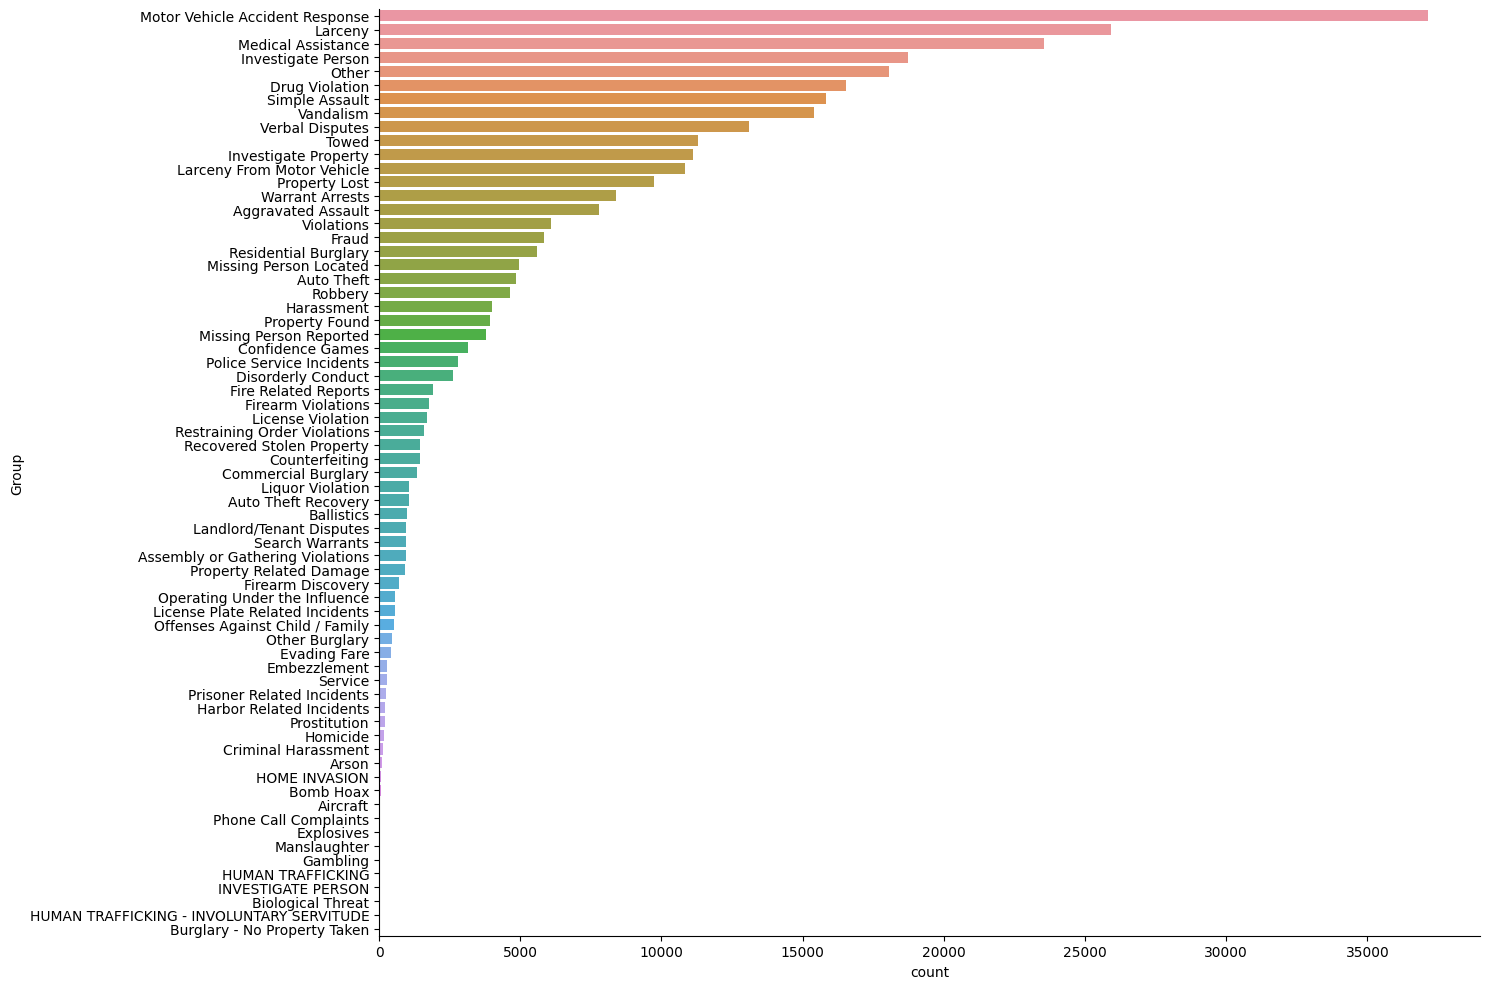

In [59]:
# Countplot for crime types
sns.catplot(y='Group',
           kind='count',
            height=10, 
            aspect=1.5,
            order=boston_data.Group.value_counts().index,
           data=boston_data)

<Axes: xlabel='Group', ylabel='count'>

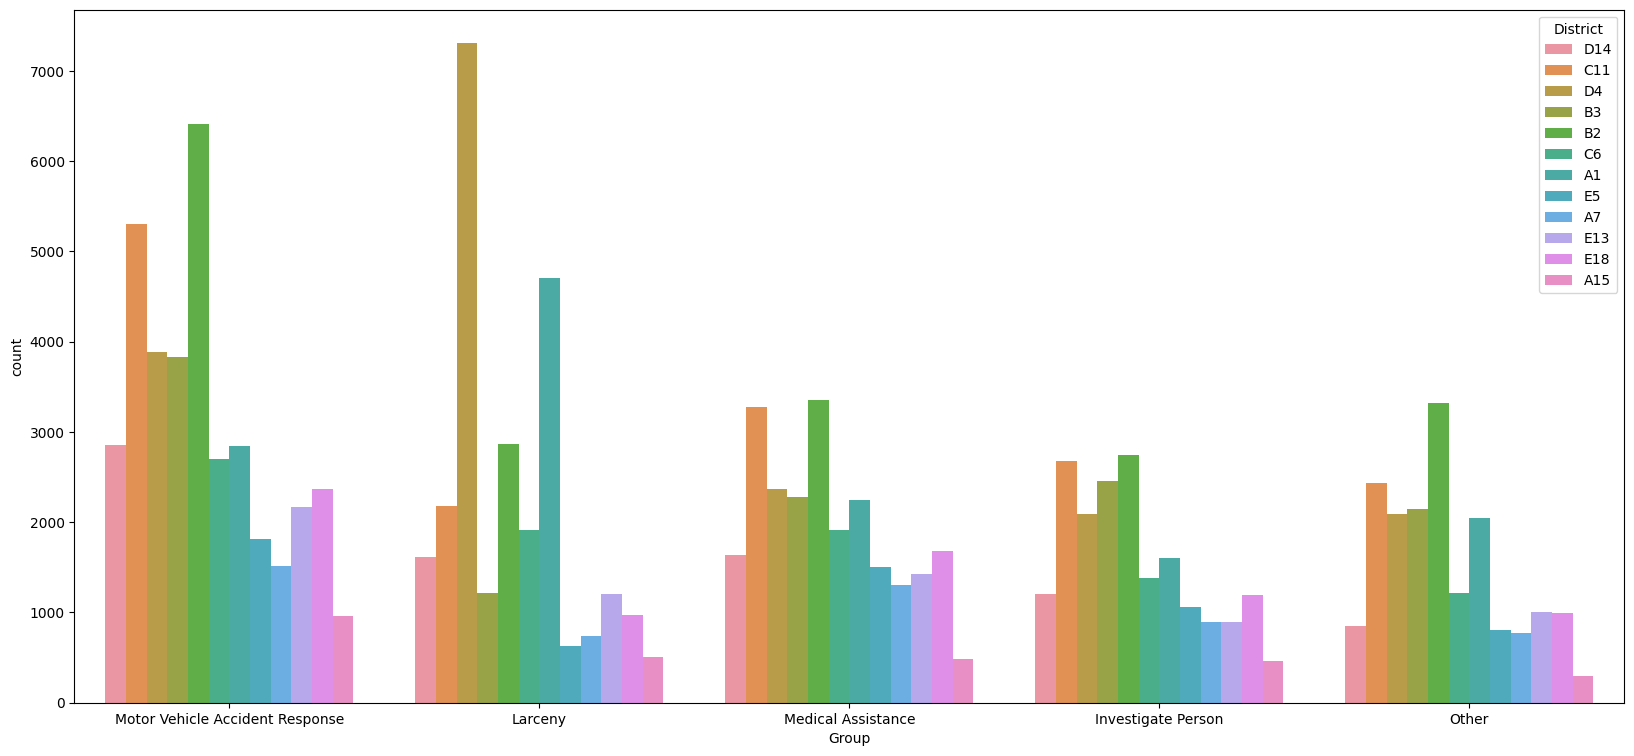

In [60]:
plt.figure(figsize = (20,9)) 
order = boston_data['Group'].value_counts().head(5).index
sns.countplot(data = boston_data, x='Group',hue='District', order = order)

### When do the crime occur?

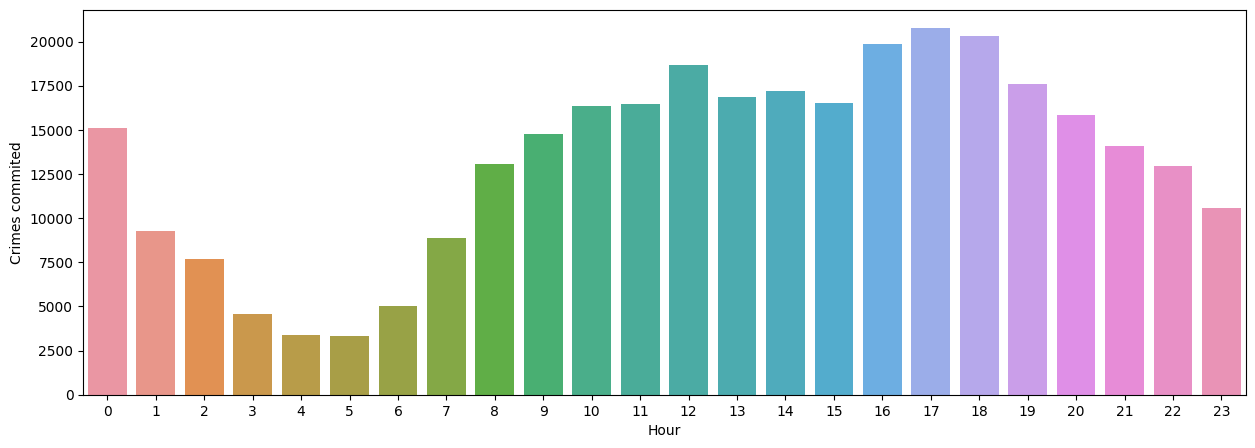

In [61]:
plt.figure(figsize = (15,5))
ax = sns.countplot(x = 'Hour', data = boston_data)
ax.set_ylabel("Crimes commited")
plt.show()

Crimes are less in the morining between 3 A.M to 6 A.M

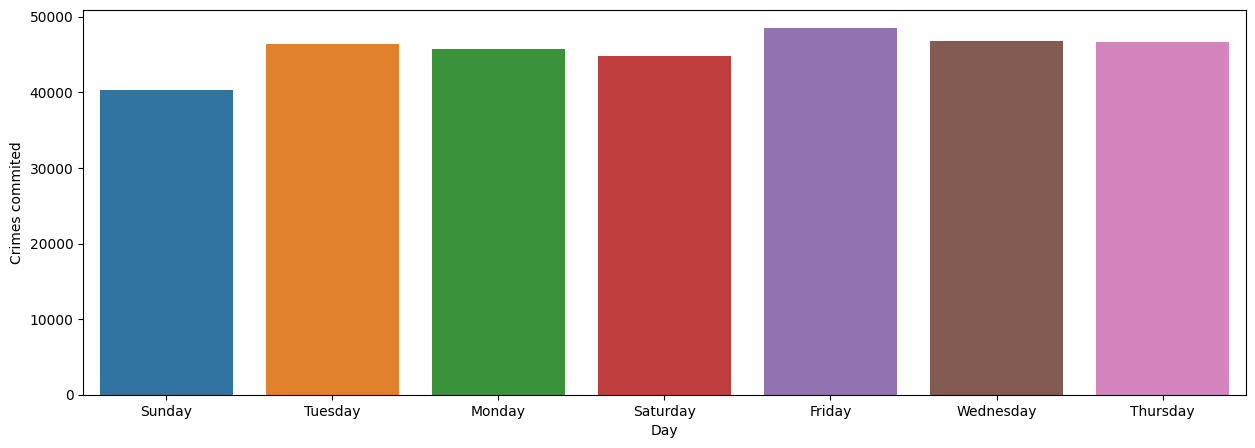

In [62]:
# crimes commited during weeks
plt.figure(figsize = (15,5))
ax = sns.countplot(x = 'Day', data = boston_data)
ax.set_ylabel("Crimes commited")
plt.show()

We cannot a trend of committing crimes on specific day

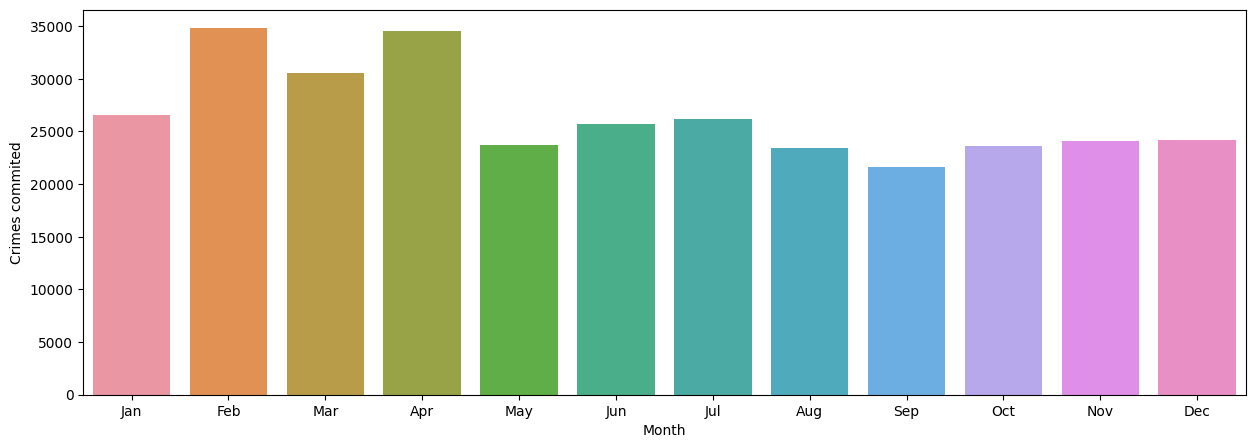

In [77]:
# convert months into readable format
month_map = {
    1 : 'Jan',
    2 : 'Feb',
    3 : 'Mar',
    4 : 'Apr',
    5 : 'May',
    6 : 'Jun',
    7 : 'Jul',
    8 : 'Aug',
    9 : 'Sep',
    10 : 'Oct',
    11 : 'Nov',
    12 : 'Dec'
}

boston_data['Month'] = boston_data['Month'].replace(month_map) 

# crimes commited during a year
plt.figure(figsize = (15,5))
ax = sns.countplot(x = 'Month', data = boston_data)
ax.set_ylabel("Crimes commited")
ax.set_xticklabels(list(month_map.values()))
plt.show()

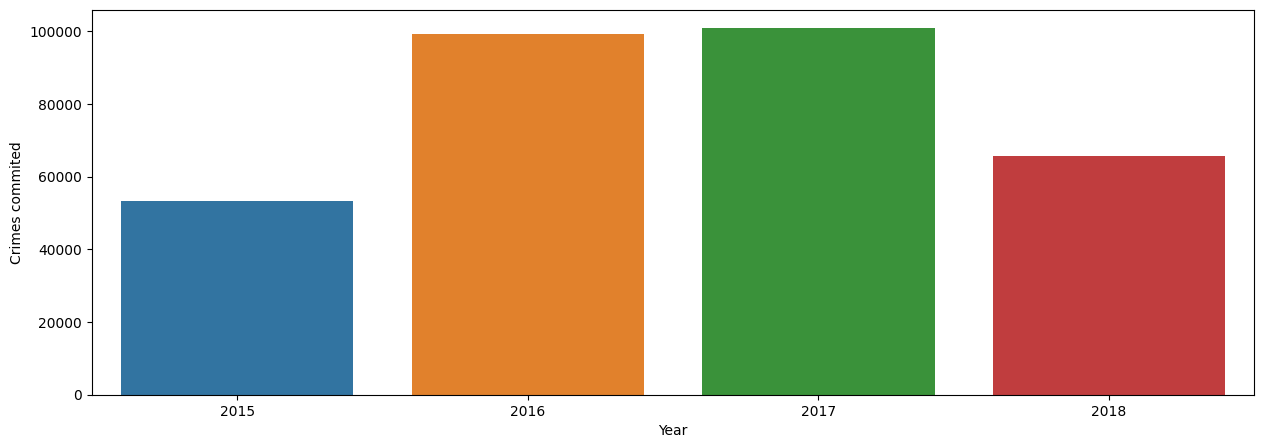

In [79]:
# crimes commited during a year
plt.figure(figsize = (15,5))
ax = sns.countplot(x = 'Year', data = boston_data)
ax.set_ylabel("Crimes commited")
plt.show()

`February` and `April` contains most crime

In [82]:
boston_data['Date']

0         2018-09-02 13:00:00
1         2018-08-21 00:00:00
2         2018-09-03 19:27:00
3         2018-09-03 21:16:00
4         2018-09-03 21:05:00
                 ...         
319068    2016-06-05 17:25:00
319069    2015-07-09 13:38:00
319070    2015-07-09 13:38:00
319071    2016-05-31 19:35:00
319072    2015-06-22 00:12:00
Name: Date, Length: 319073, dtype: object

### Where do serious crimes occur?

We can use the latitude and longitude columns to plot the location of crimes in Boston. By setting the alpha parameter to a very small value, we can see that there are some crime 'hotspots'.

(-71.19, -70.99)

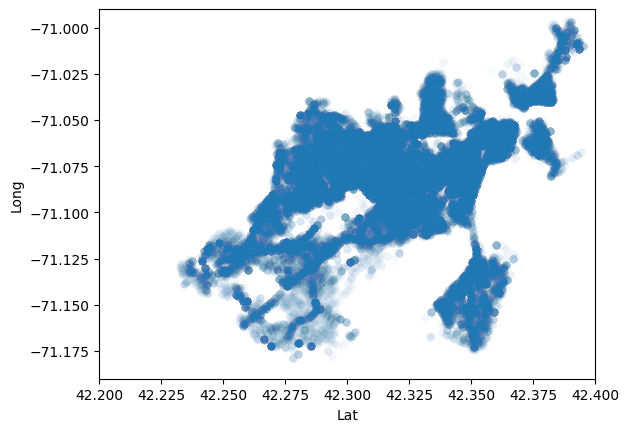

In [109]:
# Simple scatterplot
sns.scatterplot(x='Lat',
               y='Long',
               alpha = 0.01,
               data=boston_data)

plt.xlim(42.2, 42.4)
plt.ylim(-71.19,-70.99)

This scatterplot really looks like Boston. We can notice that Downtown Boston and it's nearby area has the darkest points, but there are also some localities outside of the city center that have especially high crime rates.

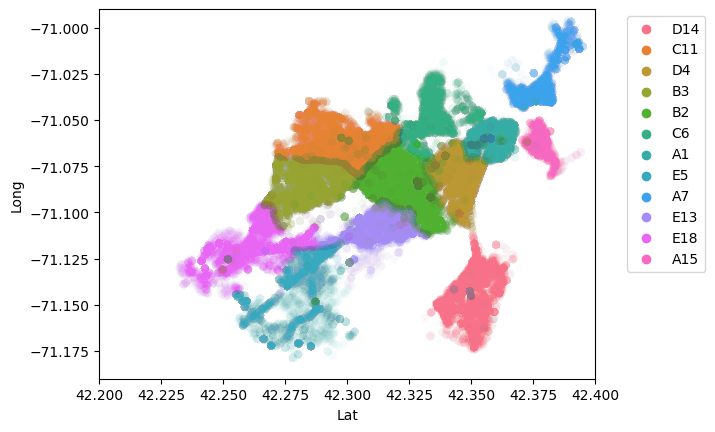

In [113]:
# Plot districts
sns.scatterplot(x='Lat',
               y='Long',
                hue='District',
                alpha=0.01,
               data=boston_data)

plt.xlim(42.2, 42.4)
plt.ylim(-71.19,-70.99)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)